In [1]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from because.probability import prob

from because.synth import read_data
from because.visualization import viz

r = read_data.Reader('/home/arun/HPCC-covid19/LLCP/llcpA.csv')
ds = r.read()

ps = prob.ProbSpace(ds)

getData:  290759 records read.


# Questions

1. **What are all the factors that influence the likelihood of a person having diabetes?**

2. **The effect of type of employment on Diabetes**

Interesting variables: Diabetes, Age, Weight, Height, BMI, Income, Employment, Physical Activity

In [2]:
target = ('diabetes','yes')
dby = round( ps.P(target), 2)
dby

0.13

# Step 1: Single Variable Distribution

Viz.show: Target =  [('diabetes',), ('age',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['diabetes', 'age']


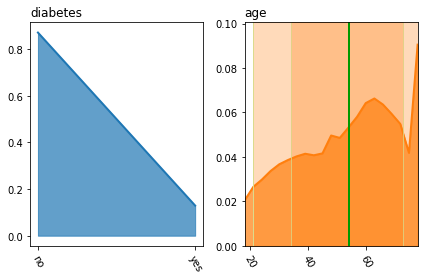

Viz.show: Target =  [('height',), ('weight',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['height', 'weight']


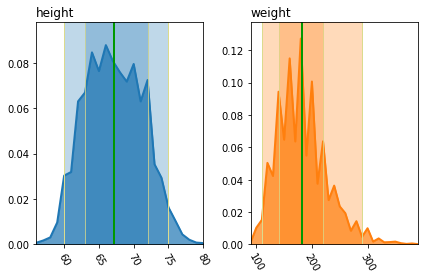

Viz.show: Target =  [('bmi',), ('income',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['bmi', 'income']


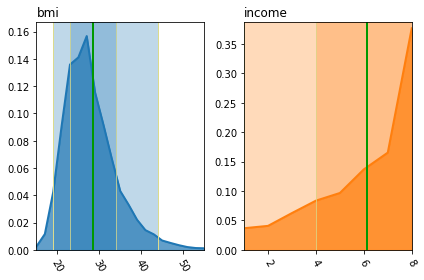

Viz.show: Target =  [('employment',), ('physicalactivity',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['employment', 'physicalactivity']


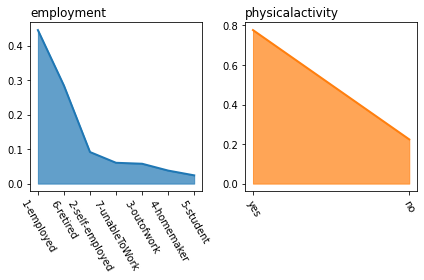

In [15]:
viz.show(probspace=ps, targetSpec=[('diabetes'),('age')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('height'),('weight')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('bmi'), ('income')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('employment'), ('physicalactivity')], condSpec=[], gtype='multi')


In [180]:
varlist1 = ['diabetes', 'income', 'employment', 'physicalactivity', 'bmicat']

for i in varlist1:
    tempVals = ps.getValues(i)
    for j in tempVals:
        print('{:<18} {:<22} {:<5}'.format(i, j, round(ps.P([(i, j)]), 2)))

diabetes           no                     0.87 
diabetes           yes                    0.13 
income             1.0                    0.04 
income             2.0                    0.04 
income             3.0                    0.06 
income             4.0                    0.08 
income             5.0                    0.1  
income             6.0                    0.14 
income             7.0                    0.17 
income             8.0                    0.38 
employment         1-employed             0.44 
employment         2-self-employed        0.09 
employment         3-outofwork            0.06 
employment         4-homemaker            0.04 
employment         5-student              0.02 
employment         6-retired              0.28 
employment         7-unableToWork         0.06 
physicalactivity   no                     0.22 
physicalactivity   yes                    0.78 
bmicat             1-underweight          0.01 
bmicat             2-normal             

In [56]:
goodVars = ['diabetes', 'age', 'height', 'weight', 'bmi', 'bmicat', 'income', 'employment', 'physicalactivity']

for i in goodVars:
    print("Expected Values of", i, "=", ps.E([i]))

Expected Values of diabetes = no
Expected Values of age = 54.1436825687253
Expected Values of height = 67.17940631244433
Expected Values of weight = 183.06693859863324
Expected Values of bmi = 28.401521535016972
Expected Values of bmicat = 3-overweight
Expected Values of income = 6.119253402302251
Expected Values of employment = 1-employed
Expected Values of physicalactivity = yes


### Observations : 

From the survey, 

* Around 87% of the surveyed people have no diabetes 

* Around 53% of the people are in the age between 55 and above in ageGroup (5,6)

* 1/3rd of surveyed people are overweight in nature. (around 36%)

* Around 44% of the people in participated in survey are employed.

* 37% of the surveyed people have income over 75000 per annum. (around 38%)


In [77]:
# typical example of extremely obese 
print("1,", ps.P([('bmicat', '5-extremely obese')], [('height', None, 65), ('weight', 275, None)])) #1.0

print("2,", ps.E([('height')], [('bmicat', '1-underweight'), ('weight', None, 130)])) # 65.85

print("3,", ps.E([('weight')], [('bmicat', '1-underweight'), ('height', None, 65)])) # 95

print("4,", ps.P([('bmicat', '1-underweight')], [('height', None, 70), ('weight', None, 90)])) #0.94

print("5,", ps.E([('height')], [('bmicat', '5-extremely obese')])) #66

print("6,", ps.E([('weight')], [('bmicat', '5-extremely obese')])) #278

print("7,", ps.E(['weight'], [('bmicat', '5-extremely obese'), ('height', 80, None)])) #420

print("8,", ps.P([('bmicat', '5-extremely obese')], [('height', 80, None), ('weight', 400, None)])) #1.0

1, 1.0
2, 65.84892680242157
3, 94.86100676183321
4, 0.944954128440367
5, 66.37950088044204
6, 278.5141781528933
7, 420.0
8, 1.0


# Step 2: Pairwise relationship of variables with Diabetes

In [344]:
condList = ['age', 'height', 'weight', 'bmi', 'bmicat', 'income', 'employment', 'physicalactivity']
varlist1 = ['diabetes', 'income', 'employment', 'physicalactivity', 'ageGroup', 'bmicat']

print(f"condVar,\tj,\t P(diabetes = yes | condVar=j), P(diabetes = yes), diff(conditioned - orignial)")
print()

db_yes = round(ps.P([('diabetes', 'yes')]), 2)

for i in condList:
    # print("Expected Values of", i, "=", ps.E(['diabetes'], ['age']))
    if i in varlist1:
        for j in ps.getValues(i):
            tempProb = round(ps.P([('diabetes', 'yes')], [(i, j)], power=1), 2)
            print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format(i, j, tempProb, db_yes, round(tempProb-db_yes, 2)))
    else:
        tempProb = round(ps.P([('diabetes', 'yes')], [i], power=1), 2)
        print('{:<39} {:>8}  {:>8}  {:>12}'.format(i, tempProb, db_yes, round(tempProb-db_yes, 2)))

condVar,	j,	 P(diabetes = yes | condVar=j), P(diabetes = yes), diff(conditioned - orignial)

age                                          0.1      0.13         -0.03
height                                      0.12      0.13         -0.01
weight                                      0.15      0.13          0.02
bmi                                         0.11      0.13         -0.02
bmicat              1-underweight           0.05      0.13         -0.08
bmicat              2-normal                0.06      0.13         -0.07
bmicat              3-overweight            0.11      0.13         -0.02
bmicat              4-obese                 0.19      0.13          0.06
bmicat              5-extremely obese       0.29      0.13          0.16
income              1.0                      0.2      0.13          0.07
income              2.0                     0.23      0.13           0.1
income              3.0                      0.2      0.13          0.07
income              4.0        

### Observations :

1. As the income increased, the effect of conditioning the income on diabetes decreased.

2. Students have lesser prone to diabetes, while the retired people and those who are unable to work are having higher chances of diabetes.

3. The difference between the people who have diabetes and those who does not have diabetes is 12%.

4. 22% of the people without physical activities are having diabetes.

## Diabetes vs Age

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


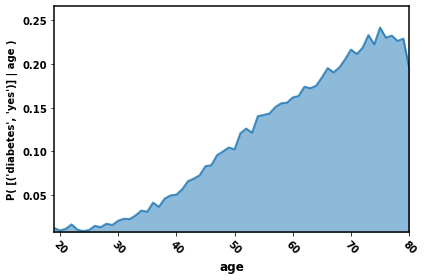

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = no) =                                 0.8708965156710541
P(diabetes = yes | age) =                          0.10371819960861056
P(diabetes = no | age) =                           0.8962818003913894
P(diabetes = yes | age) - P(diabetes = yes) =     -0.02538528472033541


In [220]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['age'], gtype='pdf')

dby = ps.P([('diabetes', 'yes')])
dbn = ps.P([('diabetes', 'no')])
dby_age = ps.P([('diabetes', 'yes')], ['age'])
dbn_age = ps.P([('diabetes', 'no')], ['age'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = no) = {:>50}".format(dbn))
print("P(diabetes = yes | age) = {:>44}".format(dby_age))
print("P(diabetes = no | age) = {:>44}".format(dbn_age))
print("P(diabetes = yes | age) - P(diabetes = yes) = {:>24}".format(dby_age - dby))

### Observations : 

* Diabetes and Age are positively correlated.

* Probability of diabetes increases with the age. 

## Diabetes vs Weight

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


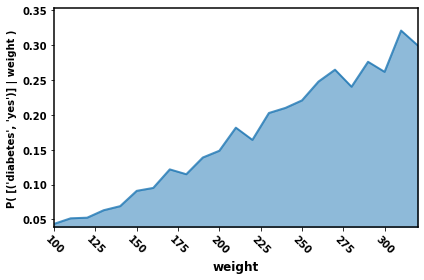

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = yes | weight) =                       0.1505452105351451
P(diabetes = yes | weight) - P(diabetes = yes) =   0.021441726206199135


In [225]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['weight'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_weight = ps.P(target, ['weight'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = yes | weight) = {:>40}".format(dby_weight))
print("P(diabetes = yes | weight) - P(diabetes = yes) = {:>22}".format(dby_weight - dby))

### Observations : 

* Diabetes and Weight are positively correlated.

* As weight increases, the probability of diabetes increases.

## Diabetes vs Height

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


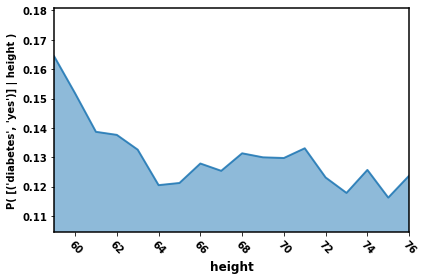

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = yes | height) =                       0.12455367493623928
P(diabetes = yes | height) - P(diabetes = yes) =  -0.0045498093927066885


In [229]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['height'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_height = ps.P(target, ['height'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = yes | height) = {:>41}".format(dby_height))
print("P(diabetes = yes | height) - P(diabetes = yes) = {:>23}".format(dby_height - dby))

### Observations : 

* As height increased, there seems to be a decrease in the probability of diabetes.

## Diabetes vs BMI

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.001


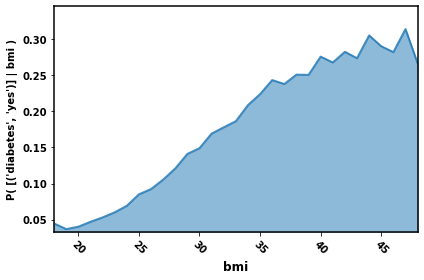

P(diabetes = yes) =                              0.12910348432894597
P(diabetes = yes | bmi) =                        0.10518800571156592
P(diabetes = yes | bmi) - P(diabetes = yes) =   -0.023915478617380054


In [232]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['bmi'], gtype='pdf')

target = ('diabetes','yes')

dby = ps.P(target)

dby_bmi = ps.P(target, ['bmi'])

print("P(diabetes = yes) = {:>48}".format(dby))
print("P(diabetes = yes | bmi) = {:>42}".format(dby_bmi))
print("P(diabetes = yes | bmi) - P(diabetes = yes) = {:>23}".format(dby_bmi - dby))

### Observations :

* Diabetes and BMI are positively correlated.

* As BMI increases, the probability of diabetes increases.

## Diabetes vs Income

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


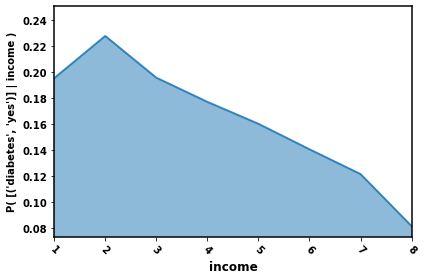

P(diabetes = yes) =                                0.12910348432894597
P(diabetes = yes | income) =                       0.1521842490633499
P(diabetes = yes | income) - P(diabetes = yes) =   0.02308076473440393


In [237]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['income'], gtype='pdf')

dby_income = ps.P(target, ['income'])

print("P(diabetes = yes) = {:>50}".format(dby))
print("P(diabetes = yes | income) = {:>40}".format(dby_income))
print("P(diabetes = yes | income) - P(diabetes = yes) = {:>21}".format(dby_income - dby))

### Observations :

* Diabetes and Income are negatively correlated.

* As income increases, the probability of diabetes increases.

* the directionality of the relation is not clear.

## Diabetes vs Employment

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


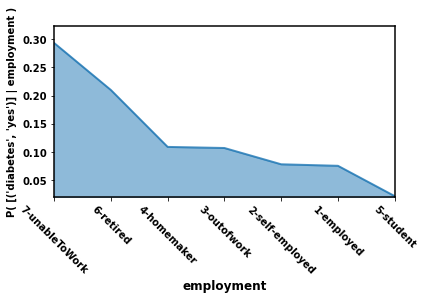

employment          1-employed              0.08      0.13         -0.05
employment          2-self-employed         0.08      0.13         -0.05
employment          3-outofwork             0.11      0.13  -0.020000000000000004
employment          4-homemaker             0.11      0.13  -0.020000000000000004
employment          5-student               0.02      0.13         -0.11
employment          6-retired               0.21      0.13  0.07999999999999999
employment          7-unableToWork          0.29      0.13  0.15999999999999998


In [265]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['employment'], gtype='pdf')

for i in ps.getValues('employment'):
    dby_employment = round(ps.P(target, [('employment', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('employment', i, dby_employment, dby, dby_employment-dby))

### Observations :

* Students have lesser prone to diabetes, while the retired people and those who are unable to work are having higher chances of diabetes.

* People who are not able to work are having 16% higher chances of diabetes.

* Retired people have 8% higher chances of diabetes.

## Diabetes vs Physical Activity

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('physicalactivity',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


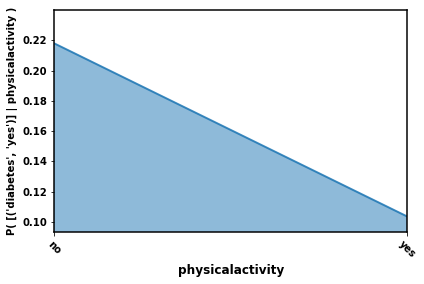

physicalactivity    no                      0.22      0.13          0.09
physicalactivity    yes                      0.1      0.13         -0.03


In [266]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['physicalactivity'], gtype='pdf')

dby = round( ps.P(target), 2)

for i in ps.getValues('physicalactivity'):
    dby_physicalactivity = round(ps.P(target, [('physicalactivity', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('physicalactivity', i, dby_physicalactivity, dby, dby_physicalactivity-dby))

### Observations :

* 22% of the people who are not doing any physical activities are having diabetes which is 12% more than the people who are doing physical activities.

* The difference between the people who have diabetes and those who does not have diabetes is 12%.

## Diabetes | BMI Category

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmicat',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  1
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


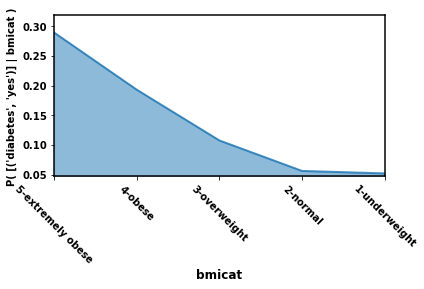

bmicat              1-underweight           0.05      0.13         -0.08
bmicat              2-normal                0.06      0.13         -0.07
bmicat              3-overweight            0.11      0.13  -0.020000000000000004
bmicat              4-obese                 0.19      0.13          0.06
bmicat              5-extremely obese       0.29      0.13  0.15999999999999998


In [38]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['bmicat'], gtype='pdf')

dby = round( ps.P(target), 2)

for i in ps.getValues('bmicat'):
    dby_bmicat = round(ps.P(target, [('bmicat', i)]), 2)
    print('{:<18}  {:<18}  {:>8}  {:>8}  {:>12}'.format('bmicat', i, dby_bmicat, dby, dby_bmicat-dby))

# Step 3: Effect of diabetes on variables 

In [35]:
print("var \t\t ps.E(var) \t\tps.E(var | db=yes) \t\tdiff \t\t ps.E(var|db=no) \t\t diff\n")

for i in ['age', 'height', 'weight', 'bmi', 'income']:
    e_i = round(ps.E(i), 2)
    e_i_dby =  round(ps.E(i, [('diabetes', 'yes')]), 2)
    e_i_dbn =  round(ps.E(i, [('diabetes', 'no')]), 2)
    print('{:<18} {:<24} {:<24} {:<10} {:20} {:24}'.format(i, e_i, e_i_dby, round(e_i - e_i_dby, 2), e_i_dbn, round(e_i - e_i_dbn, 2)))

for i in ['employment', 'physicalactivity', 'bmicat']:
    e_i = ps.E(i)
    e_i_dby =  ps.E(i, [('diabetes', 'yes')])
    e_i_dbn =  ps.E(i, [('diabetes', 'no')])
    print('{:<18} {:<24} {:50} {:<10}'.format(i, e_i, e_i_dby, e_i_dbn))

var 		 ps.E(var) 		ps.E(var | db=yes) 		diff 		 ps.E(var|db=no) 		 diff

age                54.14                    63.91                    -9.77                      52.7                     1.44
height             67.18                    67.03                    0.15                       67.2                    -0.02
weight             183.07                   203.11                   -20.04                    180.1                     2.97
bmi                28.4                     31.7                     -3.3                      27.91                     0.49
income             6.12                     5.43                     0.69                       6.22                     -0.1
employment         1-employed               6-retired                                          1-employed
physicalactivity   yes                      yes                                                yes       
bmicat             3-overweight             4-obese                                  

### Observations :

* Expected Age of the people with diabetes is 64 and for those without diabetes, it is 53.

* The height difference between the people with diabetes and without diabetes is not significant. (0.17 inches)

* People with diabetes weigh 23 pounds more than those without diabetes.

* People with diabetes have higher BMI of 3.8 more than the people without diabetes.

* The difference between the average income of all people and that of average income of people with diabetes is quite significant.(0.7)

* The expected income of people without diabetes is above 50000 per annum.

* Most of the people with the diabetes are retired people, while employees cover most of surveyed people, it is that category of people where diabetes is not expected much.

# Step 4: Conditionalization on one variable

In [382]:
# Master table with All pairwise combinations of variables and their conditional probabilities with respect to diabetes
# It is master without bmicat

table = []

list1 = ['age', 'height', 'weight', 'bmi']
list2 = ['income', 'employment', 'physicalactivity']
list3 = list1+list2

for i in range(len(list1)):
    for j in range(i, len(list3)):
        if list3[j] in list2:
            for k in ps.getValues(list3[j]):
                u = round(ps.P(target, [list1[i]]), 2)
                v = round(ps.P(target, [(list3[j], k)]), 2)
                w = round(ps.P(target, [list1[i],(list3[j], k)]), 2)

                table.append([list1[i], list3[j], k, u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

        elif list1[i] != list3[j]:
            u = round(ps.P(target, [list1[i]]), 2)
            v = round(ps.P(target, [list3[j]]), 2)
            w = round(ps.P(target, [list1[i],list3[j]]), 2)
            table.append([list1[i], list3[j], " ", u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

for i in list2:
    for j in ps.getValues(i):
        for k in list2:
            if k != i:
                for l in ps.getValues(k):
                    u = round(ps.P(target, [(i,j)]), 2)
                    v = round(ps.P(target, [(k, l)]), 2)
                    w = round(ps.P(target, [(i,j) ,(k, l)]), 2)
                    table.append([str(i)+str(j), k, l, u, v, w, dby, round(u-dby, 2), round(w-dby, 2), round(w-u, 2)])

df = pd.DataFrame(table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)'])
df.shape 

(246, 10)

## Conditionalized on Age

In [60]:
age_table = []

u = round(ps.P(target, ['age']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['age', (i, j)]), 2) #var1, var2
        age_table.append(['age', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

# conditionlizing age on continuous variables
print(ps.P(target, [('age')]))
print(ps.P(target, [('age'), ('height', None, 64)]))
print(ps.P(target, [('age'), ('weight', 180, 191)]))
print(ps.P(target, [('age'), ('bmi', 18, 25)]))
print(ps.P(target, [('age'), ('income', 1, 2.1)]))
print(ps.P(target, [('age'), ('income', 2, 3.1)]))

df_age = pd.DataFrame(age_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_age


0.10371819960861056
0.11095608721110649
0.09355055979725095
0.043977924814731874
0.1763678557592542
0.1710400712783436


var1              var2            var2Val  P(db=yes|var1)  P(db=yes|var2)  \
0   age        employment         1-employed             0.1            0.08   
1   age        employment    2-self-employed             0.1            0.08   
2   age        employment        3-outofwork             0.1            0.11   
3   age        employment        4-homemaker             0.1            0.11   
4   age        employment          5-student             0.1            0.02   
5   age        employment          6-retired             0.1            0.21   
6   age        employment     7-unableToWork             0.1            0.29   
7   age  physicalactivity                 no             0.1            0.22   
8   age  physicalactivity                yes             0.1            0.10   
9   age            bmicat      1-underweight             0.1            0.05   
10  age            bmicat           2-normal             0.1            0.06   
11  age            bmicat       3-overweight             0.1            0.11   
12  age            bmicat            4-obese             0.1            0.19   
13  age            bmicat  5-extremely obese             0.1            0.29   

    P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  diff:db(var2)-dby  \
0                  0.09       0.13              -0.03              -0.05   
1                  0.07       0.13              -0.03              -0.05   
2                  0.12       0.13              -0.03              -0.02   
3                  0.08       0.13              -0.03              -0.02   
4                  0.12       0.13              -0.03              -0.11   
5                  0.11       0.13              -0.03               0.08   
6                  0.22       0.13              -0.03               0.16   
7                  0.17       0.13              -0.03               0.09   
8                  0.08       0.13              -0.03              -0.03   
9                  0.06       0.13              -0.03              -0.08   
10                 0.04       0.13              -0.03              -0.07   
11                 0.08       0.13              -0.03              -0.02   
12                 0.15       0.13              -0.03               0.06   
13                 0.26       0.13              -0.03               0.16   

    diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0                      -0.04                        -0.01   
1                      -0.06                        -0.03   
2                      -0.01                         0.02   
3                      -0.05                        -0.02   
4                      -0.01                         0.02   
5                      -0.02                         0.01   
6                       0.09                         0.12   
7                       0.04                         0.07   
8                      -0.05                        -0.02   
9                      -0.07                        -0.04   
10                     -0.09                        -0.06   
11                     -0.05                        -0.02   
12                      0.02                         0.05   
13                      0.13                         0.16   

    diff:db(var1,var2)-db(var2)  
0                          0.01  
1                         -0.01  
2                          0.01  
3                         -0.03  
4                          0.10  
5                         -0.10  
6                         -0.07  
7                         -0.05  
8                         -0.02  
9                          0.01  
10                        -0.02  
11                        -0.03  
12                        -0.04  
13                        -0.03

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['age']
enhance =  False
nTests =  496
Test Time =  0.003


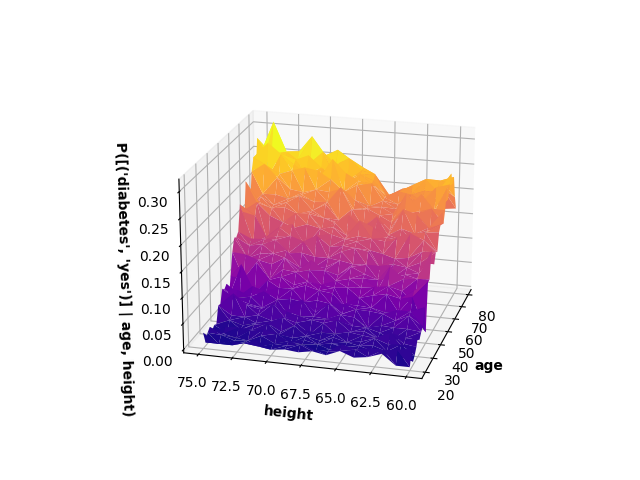

In [39]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'height'], controlFor=['age'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['age']
enhance =  False
nTests =  248
Test Time =  0.002


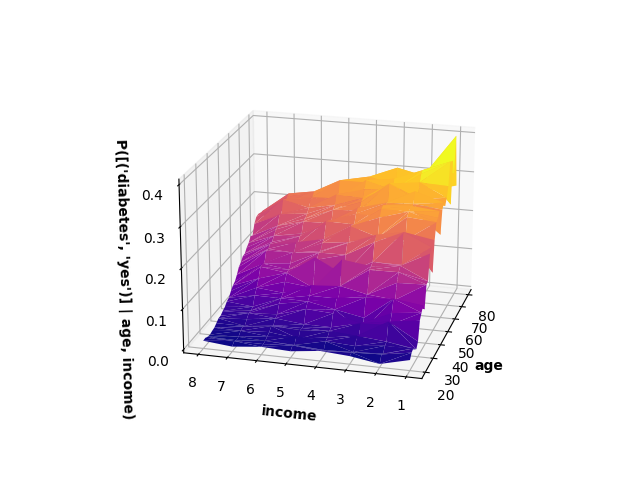

In [40]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'income'], controlFor=['age'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['age']
enhance =  False
nTests =  837
Test Time =  0.008


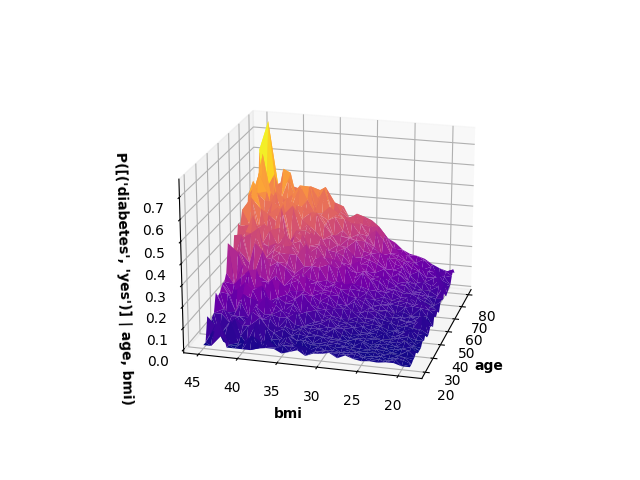

In [42]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'bmi'], controlFor=['age'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('age',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['age']
enhance =  False
nTests =  620
Test Time =  0.005


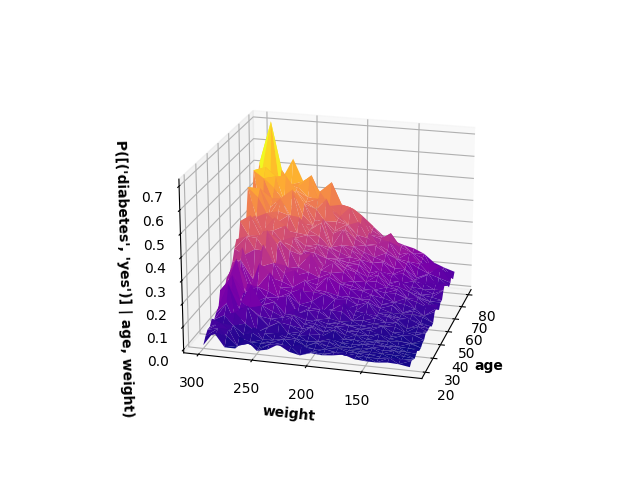

In [43]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['age', 'weight'], controlFor=['age'], gtype='pdf')

### Observations :

* Extremely obese and obese people positively affecting the diabetes probability conditioned on Age.

* Conditionalized on Age, the probability of diabetes increased for people who are not doing any physical activities. (by 4%)

* There is 9% increase in the probability of diabetes for those people who are unable to work, when conditionalized on age.

* Given a particular age, height does not affect the diabetes probability. And for a particular height, probability of diabetes increases with the age.

* For higher income, the rate of increase in the probability of diabetes as age increased, is lesser than the that of the lower income. The increase in the probability of diabetes starts at the age of 30. 

* conditionalized on age, the plot is similar for weight and BMI. This affirms the positive corelation between BMI and Weight.

* Given an age, if weight increases, BMI increases (because of positive corelation between BMI and Weight), the probabiltiy of diabetes also increases.

* Even if a person is having constant weight, the risk of diabetes increases as the age progresses. 

## Conditionalize on Height

In [61]:
height_table = []

u = round(ps.P(target, ['height']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['height', (i, j)]), 2) #var1, var2
        height_table.append(['height', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_height = pd.DataFrame(height_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_height

var1              var2            var2Val  P(db=yes|var1)  \
0   height        employment         1-employed            0.12   
1   height        employment    2-self-employed            0.12   
2   height        employment        3-outofwork            0.12   
3   height        employment        4-homemaker            0.12   
4   height        employment          5-student            0.12   
5   height        employment          6-retired            0.12   
6   height        employment     7-unableToWork            0.12   
7   height  physicalactivity                 no            0.12   
8   height  physicalactivity                yes            0.12   
9   height            bmicat      1-underweight            0.12   
10  height            bmicat           2-normal            0.12   
11  height            bmicat       3-overweight            0.12   
12  height            bmicat            4-obese            0.12   
13  height            bmicat  5-extremely obese            0.12   

    P(db=yes|var2)  P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  \
0             0.08                 0.07       0.13              -0.01   
1             0.08                 0.09       0.13              -0.01   
2             0.11                 0.10       0.13              -0.01   
3             0.11                 0.10       0.13              -0.01   
4             0.02                 0.02       0.13              -0.01   
5             0.21                 0.23       0.13              -0.01   
6             0.29                 0.29       0.13              -0.01   
7             0.22                 0.21       0.13              -0.01   
8             0.10                 0.10       0.13              -0.01   
9             0.05                 0.09       0.13              -0.01   
10            0.06                 0.06       0.13              -0.01   
11            0.11                 0.10       0.13              -0.01   
12            0.19                 0.18       0.13              -0.01   
13            0.29                 0.28       0.13              -0.01   

    diff:db(var2)-dby  diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0               -0.05                     -0.06                        -0.05   
1               -0.05                     -0.04                        -0.03   
2               -0.02                     -0.03                        -0.02   
3               -0.02                     -0.03                        -0.02   
4               -0.11                     -0.11                        -0.10   
5                0.08                      0.10                         0.11   
6                0.16                      0.16                         0.17   
7                0.09                      0.08                         0.09   
8               -0.03                     -0.03                        -0.02   
9               -0.08                     -0.04                        -0.03   
10              -0.07                     -0.07                        -0.06   
11              -0.02                     -0.03                        -0.02   
12               0.06                      0.05                         0.06   
13               0.16                      0.15                         0.16   

    diff:db(var1,var2)-db(var2)  
0                         -0.01  
1                          0.01  
2                         -0.01  
3                         -0.01  
4                          0.00  
5                          0.02  
6                          0.00  
7                         -0.01  
8                          0.00  
9                          0.04  
10                         0.00  
11                        -0.01  
12                        -0.01  
13                        -0.01

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['height']
enhance =  False
nTests =  496
Test Time =  0.004


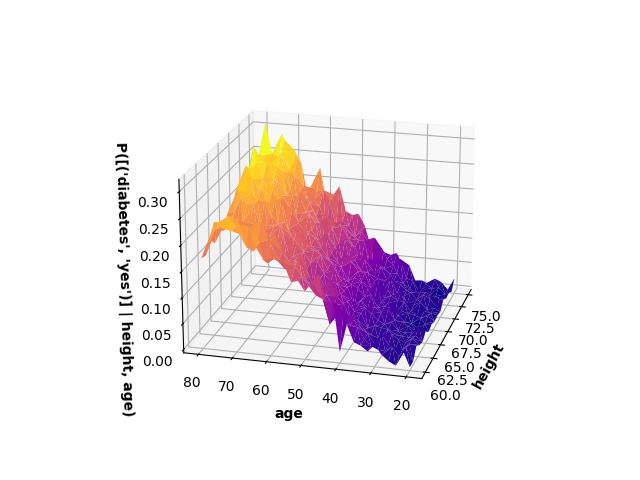

In [52]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'age'], controlFor=['height'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['height']
enhance =  False
nTests =  320
Test Time =  0.002


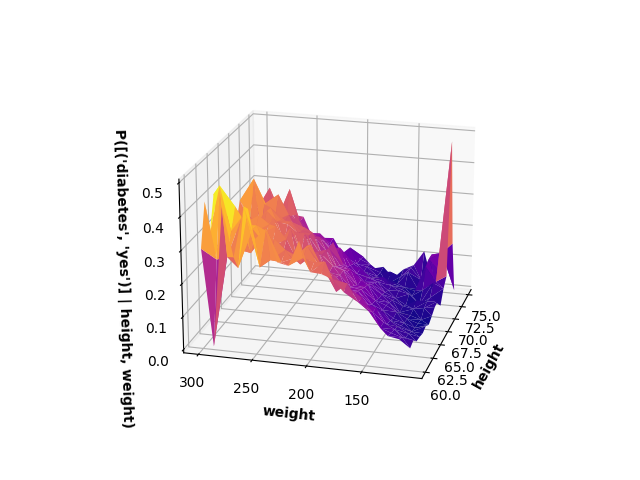

In [53]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'weight'],controlFor=['height'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['height']
enhance =  False
nTests =  128
Test Time =  0.002


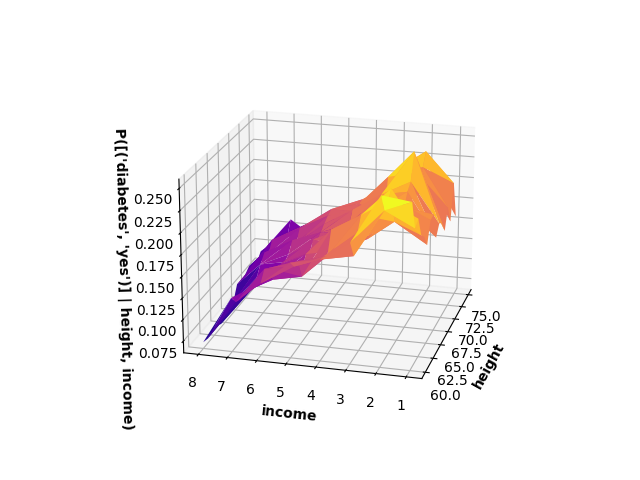

In [78]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'income'], controlFor=['height'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('height',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['height']
enhance =  False
nTests =  432
Test Time =  0.003


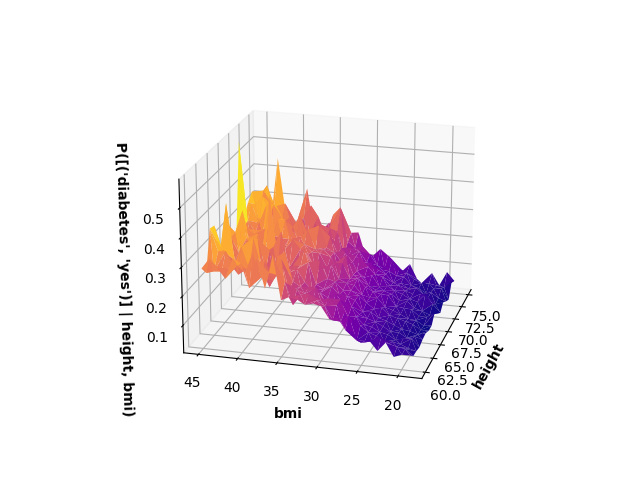

In [84]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['height', 'bmi'], controlFor=['height'], gtype='pdf')

### Observations :

* Conditionalized on Height, the probability of diabetes increased for people who are not doing any physical activities. (by 8%)

* The probability of diabetes increased for retired people(by 10%) and unable to work people (by 16%), when conditionalized on height.

* Extremly obese and obese people have positive effect on the probability of diabetes conditioned on height, while other BMI categories have negative effect.

* Conditionalized on height, as the age increased, probability of diabetes also increased.

* If the height of the person is low (<65) as the weight increased the probability of diabetes escalates quickly. This indicates positive corelation between height and weight.

* Conditionalized on Height, as the income increased, the probability of diabetes decreases. But varying height for a given income, is not affecting the probability of diabetes.

* As BMI increases, for a particular height, the probability of diabetes increases. And the increase in the height should affect the BMI (according to the BMI formula), but from the plot, this relation could not be found.

## Conditionalize on Weight

In [32]:
weight_table = []

u = round(ps.P(target, ['weight']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['weight', (i, j)]), 2) #var1, var2
        weight_table.append(['weight', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_weight = pd.DataFrame(weight_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_weight

var1              var2            var2Val  P(db=yes|var1)  \
0   weight        employment         1-employed            0.15   
1   weight        employment    2-self-employed            0.15   
2   weight        employment        3-outofwork            0.15   
3   weight        employment        4-homemaker            0.15   
4   weight        employment          5-student            0.15   
5   weight        employment          6-retired            0.15   
6   weight        employment     7-unableToWork            0.15   
7   weight  physicalactivity                 no            0.15   
8   weight  physicalactivity                yes            0.15   
9   weight            bmicat      1-underweight            0.15   
10  weight            bmicat           2-normal            0.15   
11  weight            bmicat       3-overweight            0.15   
12  weight            bmicat            4-obese            0.15   
13  weight            bmicat  5-extremely obese            0.15   

    P(db=yes|var2)  P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  \
0             0.08                 0.09       0.13               0.02   
1             0.08                 0.09       0.13               0.02   
2             0.11                 0.12       0.13               0.02   
3             0.11                 0.16       0.13               0.02   
4             0.02                 0.04       0.13               0.02   
5             0.21                 0.26       0.13               0.02   
6             0.29                 0.32       0.13               0.02   
7             0.22                 0.24       0.13               0.02   
8             0.10                 0.12       0.13               0.02   
9             0.05                 0.00       0.13               0.02   
10            0.06                 0.07       0.13               0.02   
11            0.11                 0.11       0.13               0.02   
12            0.19                 0.18       0.13               0.02   
13            0.29                 0.31       0.13               0.02   

    diff:db(var2)-dby  diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0               -0.05                     -0.04                        -0.06   
1               -0.05                     -0.04                        -0.06   
2               -0.02                     -0.01                        -0.03   
3               -0.02                      0.03                         0.01   
4               -0.11                     -0.09                        -0.11   
5                0.08                      0.13                         0.11   
6                0.16                      0.19                         0.17   
7                0.09                      0.11                         0.09   
8               -0.03                     -0.01                        -0.03   
9               -0.08                     -0.13                        -0.15   
10              -0.07                     -0.06                        -0.08   
11              -0.02                     -0.02                        -0.04   
12               0.06                      0.05                         0.03   
13               0.16                      0.18                         0.16   

    diff:db(var1,var2)-db(var2)  
0                          0.01  
1                          0.01  
2                          0.01  
3                          0.05  
4                          0.02  
5                          0.05  
6                          0.03  
7                          0.02  
8                          0.02  
9                         -0.05  
10                         0.01  
11                         0.00  
12                        -0.01  
13                         0.02

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
enhance =  False
nTests =  620
Test Time =  0.006


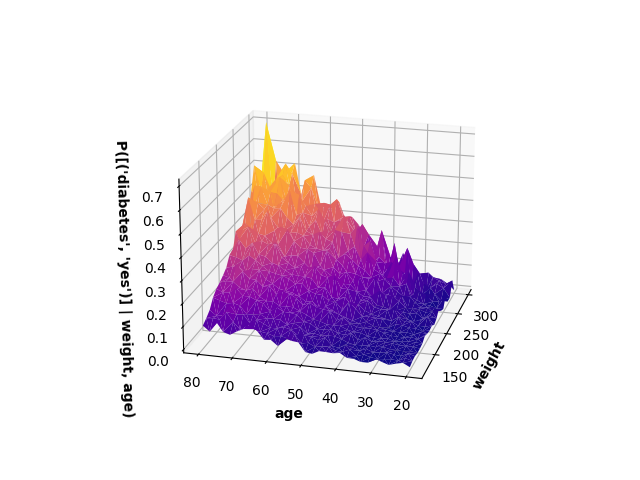

In [24]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'age'], controlFor=['weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
enhance =  False
nTests =  320
Test Time =  0.003


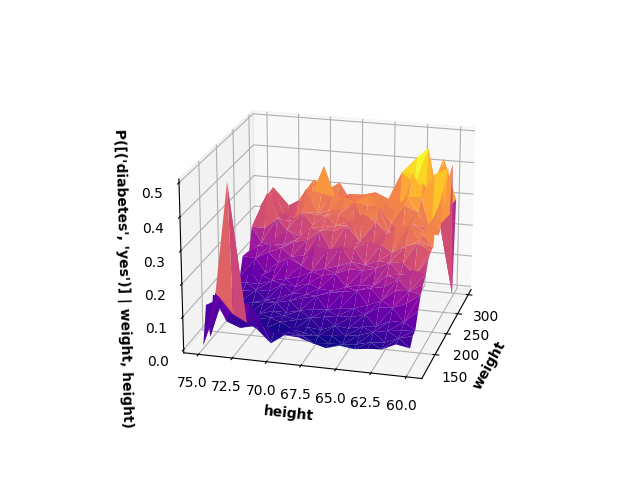

In [25]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'height'], controlFor=['weight'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  10
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  540
Test Time =  0.004


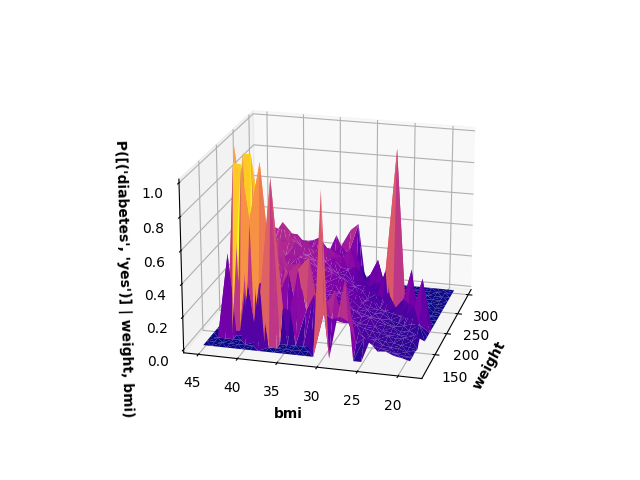

In [87]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'bmi'], controlFor=['weight'], gtype='pdf', power=10)

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('weight',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['weight']
enhance =  False
nTests =  160
Test Time =  0.001


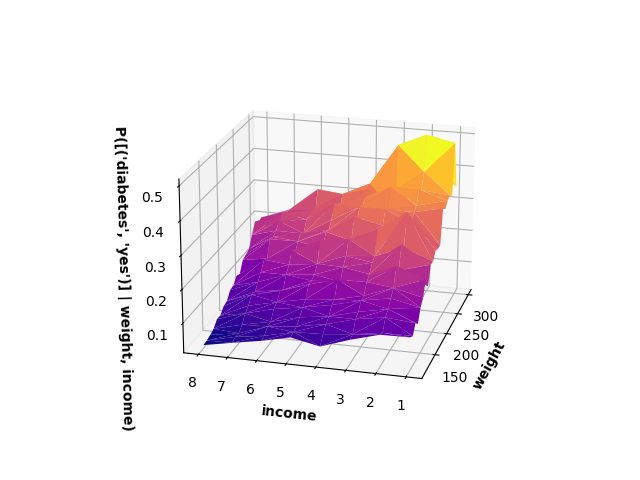

In [88]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['weight', 'income'], controlFor=['weight'], gtype='pdf')

In [97]:
for i in ps.getValues('employment'):
    print(i, ",", ps.E(['weight'], [('employment', i)]), ps.E(['weight'], [('employment', i), ('diabetes', 'yes')]))

1-employed , 187.0796343839896 212.9851050805958
2-self-employed , 185.03646068260412 206.65708812260536
3-outofwork , 184.04632559250194 208.9154616240267
4-homemaker , 165.26018922852984 182.43130724396337
5-student , 166.89427628747669 205.84415584415584
6-retired , 177.6468094897848 195.45197740112994
7-unableToWork , 192.656677301732 211.37114002718974


### observations:

* Conditionalized on weight, 'retired' people and 'unable to work' people, shows positive effect on the probability of diabetes.

* no physical activity has increases the risk of diabetes, when conditionalized on weight.

* If the weight increases for a particular age, the probability of diabetes also increases. And also if a person is having constant weight, the risk of diabetes increases as the age progresses.

* If the height of the person is low (<65), as the weight increases the probability of diabetes escalates quickly. This indicates positive corelation between height and weight. This also explains higher risk of diabetes for extremely obese people.

* Conditionalized on weight, it is difficult deduce relation from the plot diabetes=yes|bmi, weight. People with the weight over 200 pounds, does not seems to have their BMI under 30. In other words, they are not under 'normal' BMI conditions.

* The rate of increase in the probability of diabetes as the weight increases, is lesser for people with higher income than the poeple with lower income.

* The negative corelation between the income and the diabetes can be observed. As income increases, the probability of diabetes decreases. 

* Overweight people with the low income have the highest probability of diabetes among different income and weights.

## Conditionalize on BMI

In [33]:
bmi_table = []

u = round(ps.P(target, ['bmi']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['bmi', (i, j)]), 2) #var1, var2
        bmi_table.append(['bmi', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_bmi = pd.DataFrame(bmi_table, columns = ['bmi', 'var2', 'var2Val', 'P(db=yes|bmi)', 'P(db=yes|var2)', 'P(db=yes|bmi,var2)', 'P(db=yes)', 'diff:db(bmi)-dby', 'diff:db(var2)-dby', 'diff:db(bmi,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_bmi

bmi              var2            var2Val  P(db=yes|bmi)  P(db=yes|var2)  \
0   bmi        employment         1-employed           0.11            0.08   
1   bmi        employment    2-self-employed           0.11            0.08   
2   bmi        employment        3-outofwork           0.11            0.11   
3   bmi        employment        4-homemaker           0.11            0.11   
4   bmi        employment          5-student           0.11            0.02   
5   bmi        employment          6-retired           0.11            0.21   
6   bmi        employment     7-unableToWork           0.11            0.29   
7   bmi  physicalactivity                 no           0.11            0.22   
8   bmi  physicalactivity                yes           0.11            0.10   
9   bmi            bmicat      1-underweight           0.11            0.05   
10  bmi            bmicat           2-normal           0.11            0.06   
11  bmi            bmicat       3-overweight           0.11            0.11   
12  bmi            bmicat            4-obese           0.11            0.19   
13  bmi            bmicat  5-extremely obese           0.11            0.29   

    P(db=yes|bmi,var2)  P(db=yes)  diff:db(bmi)-dby  diff:db(var2)-dby  \
0                 0.05       0.13             -0.02              -0.05   
1                 0.07       0.13             -0.02              -0.05   
2                 0.09       0.13             -0.02              -0.02   
3                 0.11       0.13             -0.02              -0.02   
4                 0.02       0.13             -0.02              -0.11   
5                 0.18       0.13             -0.02               0.08   
6                 0.23       0.13             -0.02               0.16   
7                 0.17       0.13             -0.02               0.09   
8                 0.09       0.13             -0.02              -0.03   
9                 0.00       0.13             -0.02              -0.08   
10                0.00       0.13             -0.02              -0.07   
11                0.08       0.13             -0.02              -0.02   
12                0.00       0.13             -0.02               0.06   
13                0.03       0.13             -0.02               0.16   

    diff:db(bmi,var2) - dby  diff:db(var1,var2)-db(var1)  \
0                     -0.08                        -0.06   
1                     -0.06                        -0.04   
2                     -0.04                        -0.02   
3                     -0.02                         0.00   
4                     -0.11                        -0.09   
5                      0.05                         0.07   
6                      0.10                         0.12   
7                      0.04                         0.06   
8                     -0.04                        -0.02   
9                     -0.13                        -0.11   
10                    -0.13                        -0.11   
11                    -0.05                        -0.03   
12                    -0.13                        -0.11   
13                    -0.10                        -0.08   

    diff:db(var1,var2)-db(var2)  
0                         -0.03  
1                         -0.01  
2                         -0.02  
3                          0.00  
4                          0.00  
5                         -0.03  
6                         -0.06  
7                         -0.05  
8                         -0.01  
9                         -0.05  
10                        -0.06  
11                        -0.03  
12                        -0.19  
13                        -0.26

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  837
Test Time =  428.04


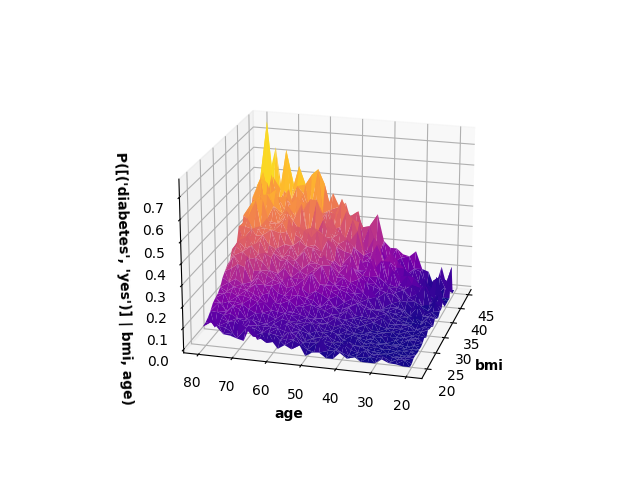

In [22]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'age'], controlFor=['bmi'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  432
Test Time =  219.267


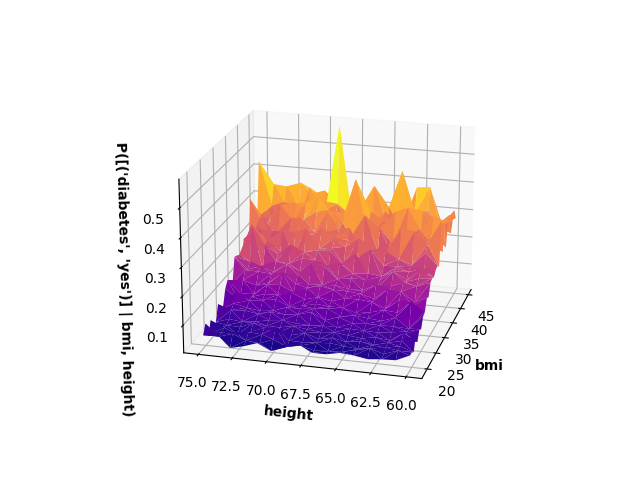

In [23]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'height'], controlFor=['bmi'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  540
Test Time =  0.004


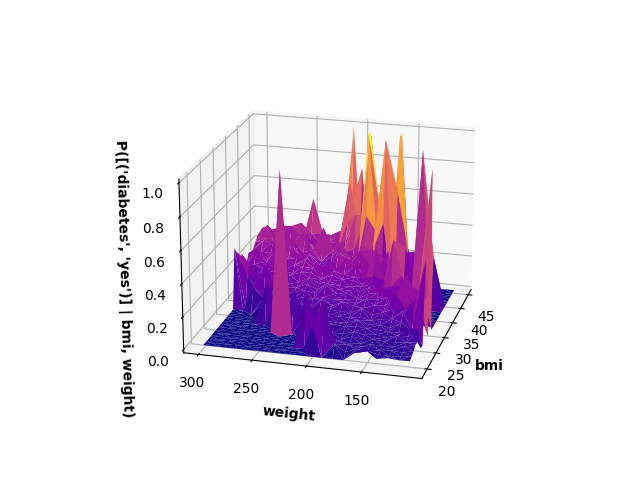

In [100]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'weight'], controlFor=['bmi'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('bmi',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  1
Viz.show: Controlling for  ['bmi']
enhance =  False
nTests =  216
Test Time =  0.001


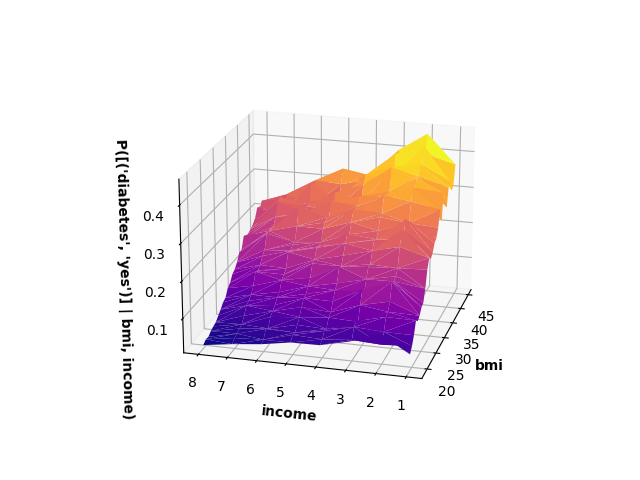

In [101]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[(target)], condSpec=['bmi', 'income'], controlFor=['bmi'], gtype='pdf')

### Observations:

* 'Retired' and 'unable to work' has increased chance of diabetes, when conditionlized on bmi. For surpise, 'homemaker' have zero effect on diabetes when conditionalized on bmi.

* no physical activiy has 6% increase in the risk of diabetes.

* surprisingly, conditionalized on income, 'extremely obese' and 'obese' people have showed decreased risk of diabetes.


* If the bmi increases for a particular age, the probability of diabetes also increases. And also if a person is having constant bmi, the risk of diabetes increases as the age progresses.

* The effect of increase in height, on diabetes is not significant.

* Conditionalized on bmi, it is difficult deduce relation from the plot diabetes=yes|bmi, weight. People with the weight over 200 pounds, does not seems to have their BMI under 30. In other words, they are not under 'normal' BMI conditions.

* The negative corelation between the income and the diabetes can be observed. As income increases, the probability of diabetes decreases. 

* Overweight people with the low income have the highest probability of diabetes among different income and weights.

* Underweight people with higher income have the lowest probability of diabetes among different income and weights.

* For higher BMI, the negative correlation between diabetes and income is more significant than that for lower bmis. In other words, for higher bmi, the rate of increase in the probability of diabetes as income decreases is more, and for lower incomes, the rate is less.

* As bmi increased, the probability of diabetes increased. This has been observed from all the plots from conditionalization of bmi.


## Conditionalized on income

In [34]:
income_table = []

u = round(ps.P(target, ['income']), 2) #var1
for i in ['employment', 'physicalactivity', 'bmicat']:
    for j in ps.getValues(i):
        v = round(ps.P(target, [(i, j)]), 2) #var2
        w = round(ps.P(target, ['income', (i, j)]), 2) #var1, var2
        income_table.append(['income', i, j, u, v, w, dby, round(u-dby, 2), round(v-dby, 2), round(w-dby, 2), round(w-u, 2), round(w-v, 2)])

df_income = pd.DataFrame(income_table, columns = ['var1', 'var2', 'var2Val', 'P(db=yes|var1)', 'P(db=yes|var2)', 'P(db=yes|var1,var2)', 'P(db=yes)', 'diff:db(var1)-dby', 'diff:db(var2)-dby', 'diff:db(var1,var2) - dby', 'diff:db(var1,var2)-db(var1)', 'diff:db(var1,var2)-db(var2)'])
df_income

var1              var2            var2Val  P(db=yes|var1)  \
0   income        employment         1-employed            0.15   
1   income        employment    2-self-employed            0.15   
2   income        employment        3-outofwork            0.15   
3   income        employment        4-homemaker            0.15   
4   income        employment          5-student            0.15   
5   income        employment          6-retired            0.15   
6   income        employment     7-unableToWork            0.15   
7   income  physicalactivity                 no            0.15   
8   income  physicalactivity                yes            0.15   
9   income            bmicat      1-underweight            0.15   
10  income            bmicat           2-normal            0.15   
11  income            bmicat       3-overweight            0.15   
12  income            bmicat            4-obese            0.15   
13  income            bmicat  5-extremely obese            0.15   

    P(db=yes|var2)  P(db=yes|var1,var2)  P(db=yes)  diff:db(var1)-dby  \
0             0.08                 0.09       0.13               0.02   
1             0.08                 0.09       0.13               0.02   
2             0.11                 0.10       0.13               0.02   
3             0.11                 0.13       0.13               0.02   
4             0.02                 0.02       0.13               0.02   
5             0.21                 0.23       0.13               0.02   
6             0.29                 0.28       0.13               0.02   
7             0.22                 0.22       0.13               0.02   
8             0.10                 0.13       0.13               0.02   
9             0.05                 0.06       0.13               0.02   
10            0.06                 0.07       0.13               0.02   
11            0.11                 0.13       0.13               0.02   
12            0.19                 0.22       0.13               0.02   
13            0.29                 0.29       0.13               0.02   

    diff:db(var2)-dby  diff:db(var1,var2) - dby  diff:db(var1,var2)-db(var1)  \
0               -0.05                     -0.04                        -0.06   
1               -0.05                     -0.04                        -0.06   
2               -0.02                     -0.03                        -0.05   
3               -0.02                      0.00                        -0.02   
4               -0.11                     -0.11                        -0.13   
5                0.08                      0.10                         0.08   
6                0.16                      0.15                         0.13   
7                0.09                      0.09                         0.07   
8               -0.03                      0.00                        -0.02   
9               -0.08                     -0.07                        -0.09   
10              -0.07                     -0.06                        -0.08   
11              -0.02                      0.00                        -0.02   
12               0.06                      0.09                         0.07   
13               0.16                      0.16                         0.14   

    diff:db(var1,var2)-db(var2)  
0                          0.01  
1                          0.01  
2                         -0.01  
3                          0.02  
4                          0.00  
5                          0.02  
6                         -0.01  
7                          0.00  
8                          0.03  
9                          0.01  
10                         0.01  
11                         0.02  
12                         0.03  
13                         0.00

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('age',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  248
Test Time =  0.002


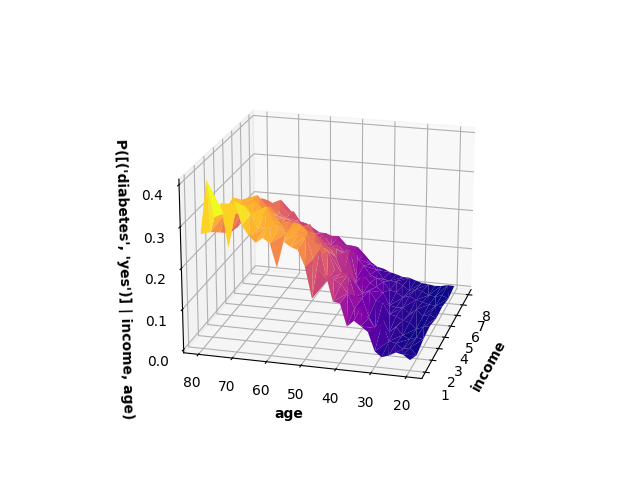

In [15]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('age')], controlFor=['income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('height',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  128
Test Time =  0.001


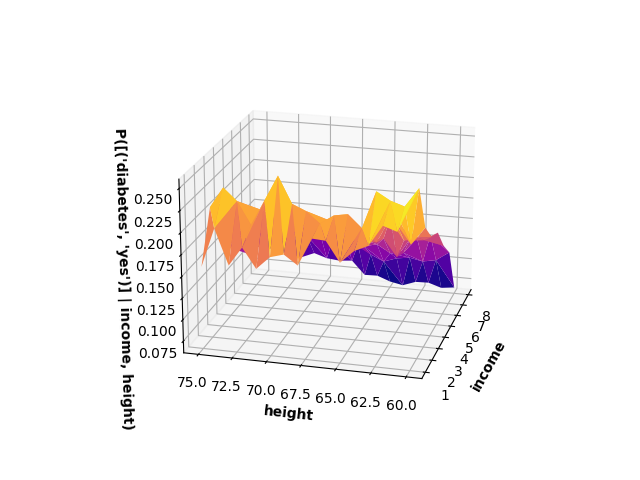

In [13]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('height')], controlFor=['income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('weight',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  160
Test Time =  0.002


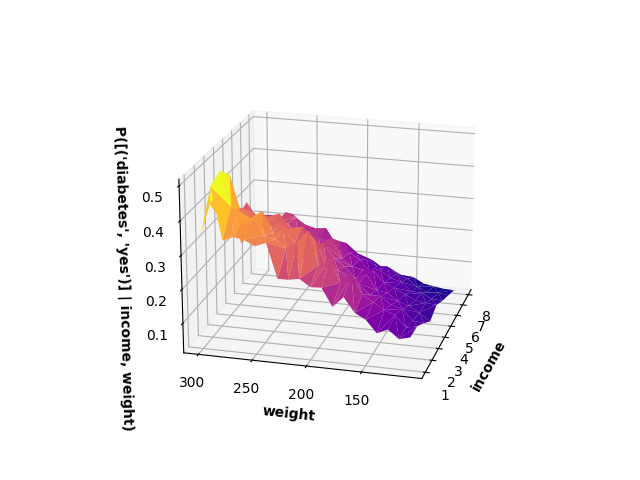

In [14]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('weight')], controlFor=['income'], gtype='pdf')

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('income',), ('bmi',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
Viz.show: Controlling for  ['income']
enhance =  False
nTests =  216
Test Time =  0.002


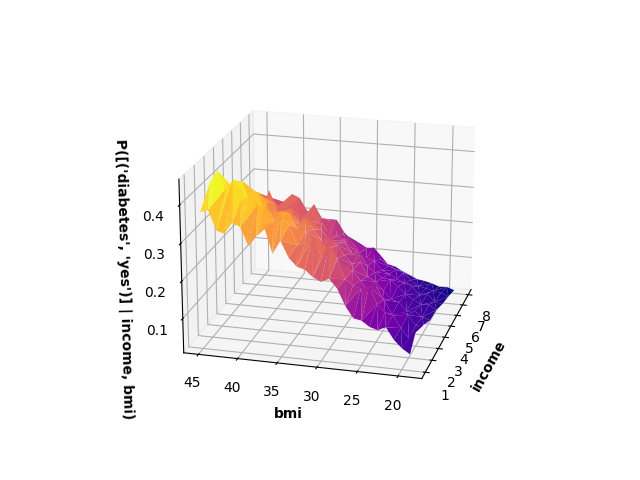

In [9]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=[('income'), ('bmi')], controlFor=['income'], gtype='pdf')

### Observations:

* 'Retired' and 'unable to work' has increased chance of diabetes, when conditionlized on income.

* no physical activiy has 7% increase in risk of diabetes.

* Conditionalized on income, 'extremely obese' and 'obese' people have increased risk of diabetes.

* As the age increases, the probability of diabetes increases, with decresing trend on increasing income.

* The effect of increase in height, on diabetes is not significant. A steep downward curve can be observed from income 2 to income 1, which is not observed in other plots.

* As weight increased, the probability of diabetes also increased.

* For higher income, the rate of increase in the probability of diabetes as BMI increases is low, and for lower incomes, the rate is higher.

* As income increased, the probability of diabetes decreased. This has been observed from all the plots, conditionalized on income.


# Step 5: Analyzing Intermediate Variables

find the effect of each employment type on height, weight, bmi, income, age, diabetes...

Viz.show: Target =  [('age',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  4.681


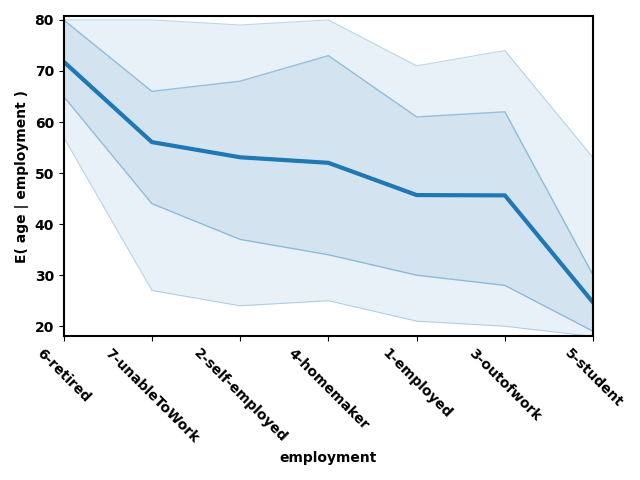

In [7]:
viz.show(probspace=ps, targetSpec=['age'], condSpec=['employment'], gtype='exp')

Viz.show: Target =  [('income',)] , Condition =  [('employment',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  5.391


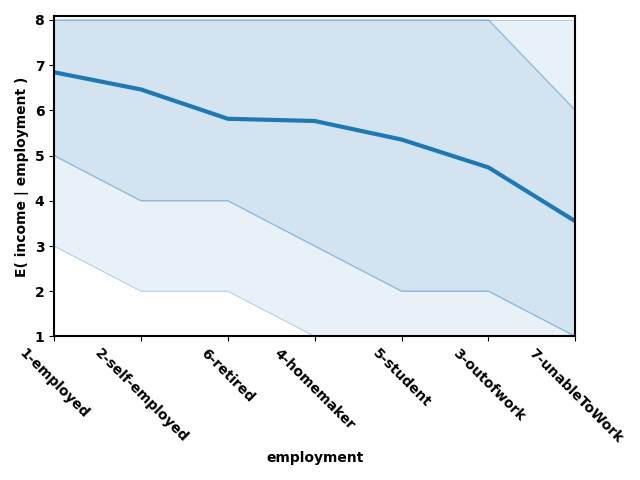

In [8]:
viz.show(probspace=ps, targetSpec=['income'], condSpec=['employment'], gtype='exp')